This exercise requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 250 active credit card holders during the last 6 months. The file is at a customer level with 3  variables.

Following is the Data Dictionary for Credit Card dataset :-

- CUSTID : Identification of Credit Card holder (Categorical)
- BALANCE : Balance amount left in their account to make purchases
- CREDITLIMIT : Limit of Credit Card for user
- TENURE : Tenure of credit card service for user

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Next, lets import our data and take a look at first couple rows:

In [2]:
dataset = pd.read_csv('creditcard.csv')

In [3]:
dataset.head(4)

,CUST_ID,BALANCE,CREDIT_LIMIT,TENURE
0,C10001,40.900749,1000,12
1,C10002,3202.467416,7000,12
2,C10003,2495.148862,7500,12
3,C10004,1666.670542,7500,12


Let's see more information about our dataset.

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CUST_ID       250 non-null    object 
 1   BALANCE       250 non-null    float64
 2   CREDIT_LIMIT  250 non-null    int64  
 3   TENURE        250 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 7.9+ KB


In [5]:
dataset.isna().sum()

CUST_ID         0
BALANCE         0
CREDIT_LIMIT    0
TENURE          0
dtype: int64

In [6]:
dataset.describe()

,BALANCE,CREDIT_LIMIT,TENURE
count,250.000000,250.000000,250.000000
mean,2550.066538,6308.200000,11.736000
std,2975.817373,4635.661787,0.974733
min,0.000000,900.000000,6.000000
25%,339.960213,2500.000000,12.000000
50%,1592.378426,5400.000000,12.000000
75%,3613.406343,8500.000000,12.000000
max,19043.138560,23000.000000,12.000000


In [7]:
X=dataset.drop("CUST_ID",axis=1)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X)

Next we are going to create a dendogram. And we will use the scipy library in order to create a dendogram

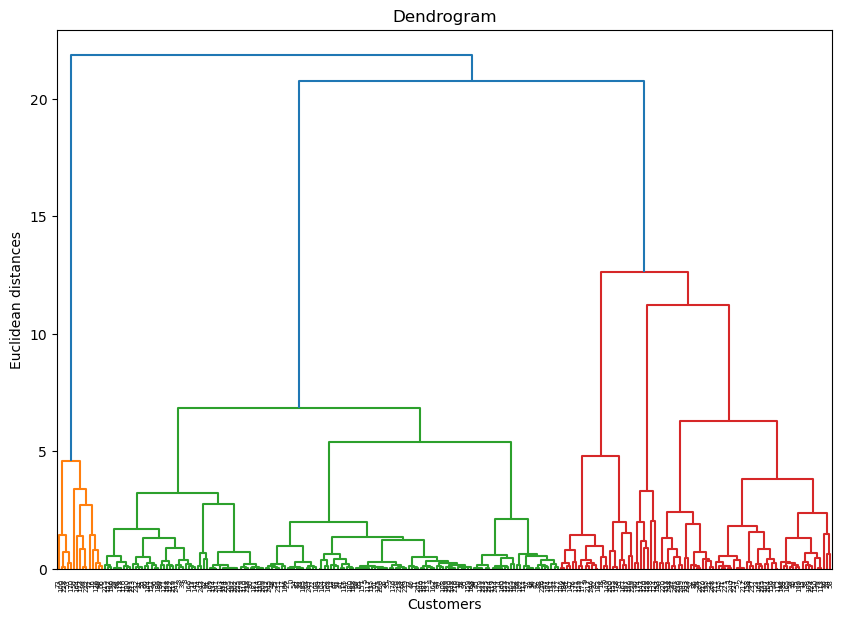

In [9]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10, 7))  
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

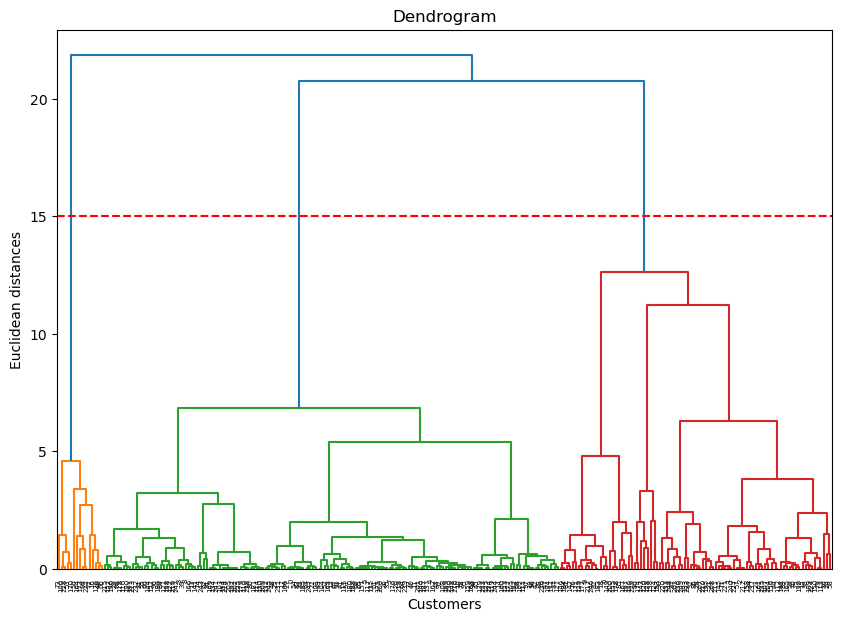

In [10]:
plt.figure(figsize=(10, 7))  
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.axhline(y=15, color='r', linestyle='--')
plt.show()

In [11]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
pred = hc.fit_predict(X)

In [12]:
pred

array([2, 1, 1, 1, 2, 2, 0, 2, 1, 0, 2, 2, 2, 1, 2, 0, 2, 2, 0, 1, 2, 0,
       2, 1, 1, 2, 2, 2, 0, 1, 0, 1, 0, 2, 1, 2, 0, 1, 0, 1, 2, 2, 1, 2,
       1, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 0, 2, 2, 1, 1, 1, 0, 2, 1, 0, 0, 0,
       1, 1, 0, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 0,
       1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 1, 1, 2, 0, 2, 2, 1, 0, 0, 1, 1,
       2, 0, 2, 2, 0, 2, 0, 2, 2, 1, 1, 0, 1, 1, 1, 1, 2, 0, 1, 1, 1, 0,
       2, 0, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 0, 2, 2, 2, 0, 0, 2, 0, 2,
       2, 2, 0, 1, 2, 1, 2, 0, 1, 2, 1, 2, 2, 2, 1, 1, 2, 0, 1, 0, 1, 0,
       1, 1, 0, 2, 2, 0, 1, 2, 2, 0, 0, 1, 0, 1, 1, 1, 2, 1, 2, 0, 2, 1,
       0, 1, 2, 0, 0, 2, 1, 1, 2, 0, 2, 2, 1, 2, 2, 1, 0, 1, 1, 2, 1, 2,
       1, 1, 2, 2, 0, 2, 0, 0])

In [13]:
dataset['cluster'] = pred

In [14]:
dataset.head(4)

,CUST_ID,BALANCE,CREDIT_LIMIT,TENURE,cluster
0,C10001,40.900749,1000,12,2
1,C10002,3202.467416,7000,12,1
2,C10003,2495.148862,7500,12,1
3,C10004,1666.670542,7500,12,1


In [15]:
dataset['cluster'].value_counts()

2    105
1     93
0     52
Name: cluster, dtype: int64

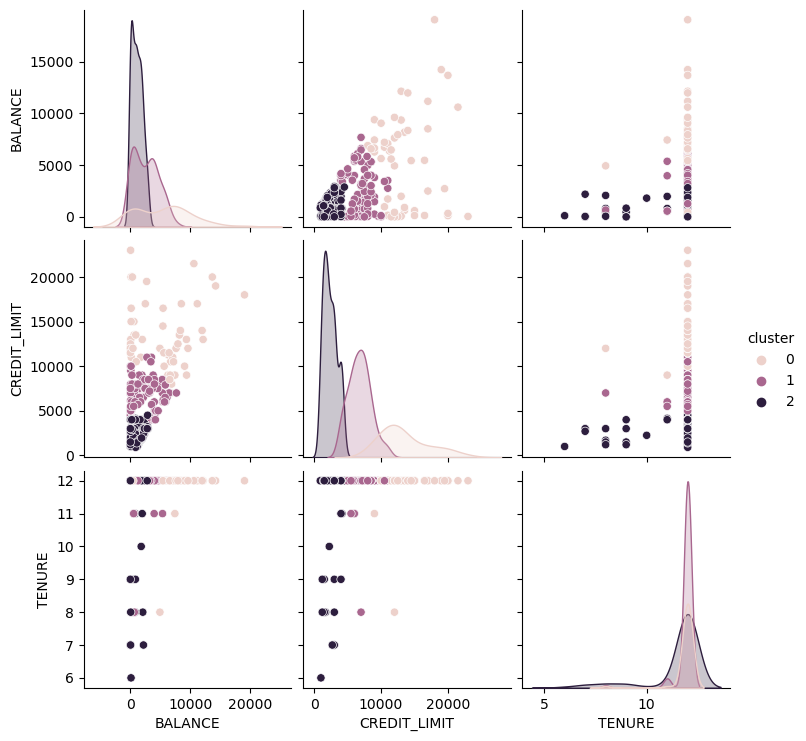

In [16]:
sns.pairplot(dataset,hue="cluster")

<AxesSubplot:xlabel='BALANCE', ylabel='CREDIT_LIMIT'>

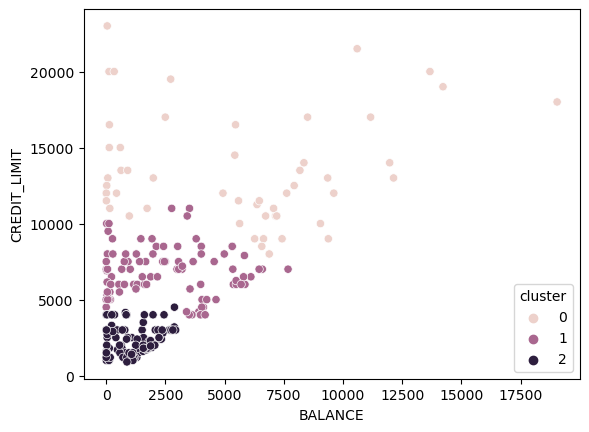

In [18]:
sns.scatterplot(x="BALANCE", y="CREDIT_LIMIT",data=dataset,hue="cluster")